# Intermediate ML Algorithms - Trees & Ensembles - Day 6

In this notebook we will cover some more complex ML algorithms - trees & ensemble methods. We can use DecisionTrees and Random Forests (RFs) for classification & regression tasks.

**Topics:**



1.   Classification: Decision Trees
2.   Classification: Random Forests (Ensemble Methods)
3.   Regression: Trees & Ensembles
4.   Interpreting Results



**Goals:**



1.   Understand the intuition behind trees & ensembles
2.   Develop a tree-based model
3.   Develop an ensemble-based model
4.   Create visualizations and explain the results of tree & ensemble based models



## Import Packages

First thing we do, everytime!

1.  **Pandas:** Working with datasets. Arguably the most widely-used data-science Python package.

2.  **NumPy:** Scientific computing package for working with vectors & matrices.

3.  **MatplotLib:** Tool for dataset vizualizations.

4.  **Seaborn:** Tool for dataset vizualizations.

5.  **Sci-Kit Learn:** Open-source ML algorithms.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

## Example 1 - The Decision Tree (Classification)

### Introduction

A decision tree is a supervised learning algorithm which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

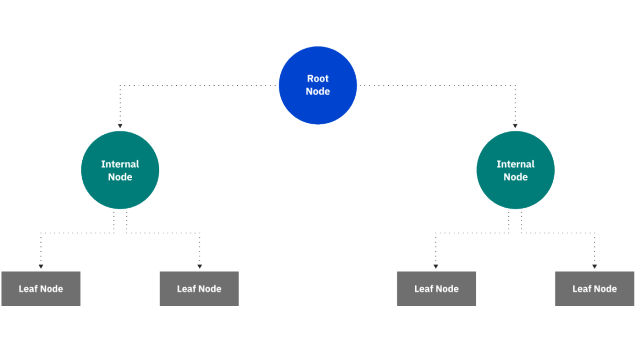

The outgoing branches from the root node feed into the internal nodes, also known as decision nodes. Based on the available features, both node types conduct evaluations to form homogenous subsets, which are denoted by leaf nodes, or terminal nodes. The leaf nodes represent all the possible outcomes within the dataset. As an example, let’s imagine that you were trying to assess whether or not you should go surf, you may use the following decision rules to make a choice:

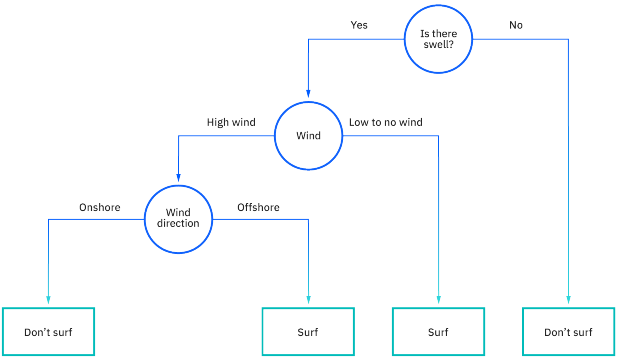

How is the algorithm making these decisions? At each decision node, the algorithm calculates the entropy.

### Data

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/j0sephsasson/Pepsi-Training-Course/main/datasets/iris.csv', index_col=0)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


As you can see above, the tree example is making decisions based on swell, wind, and wind direction. In the case of real data, these are simply the features. The model will create nodes based on the features & values, where entropy is the lowest. Seeking to isolate homogenous targets.

### The Decision Tree

In [3]:
features = list(iris.columns)
target = features.pop()

X = iris[features].copy()
y = iris[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 4)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
84,5.4,3.0,4.5,1.5
47,4.6,3.2,1.4,0.2
108,6.7,2.5,5.8,1.8
1,4.9,3.0,1.4,0.2
93,5.0,2.3,3.3,1.0


In [4]:
y_train.head()

84     versicolor
47         setosa
108     virginica
1          setosa
93     versicolor
Name: species, dtype: object

In [5]:
# Initialize DecisionTree
clf = DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    random_state=4)

# Train
clf.fit(X_train, y_train)

# Score
accuracy_score(clf.predict(X_test), y_test)

0.9666666666666667

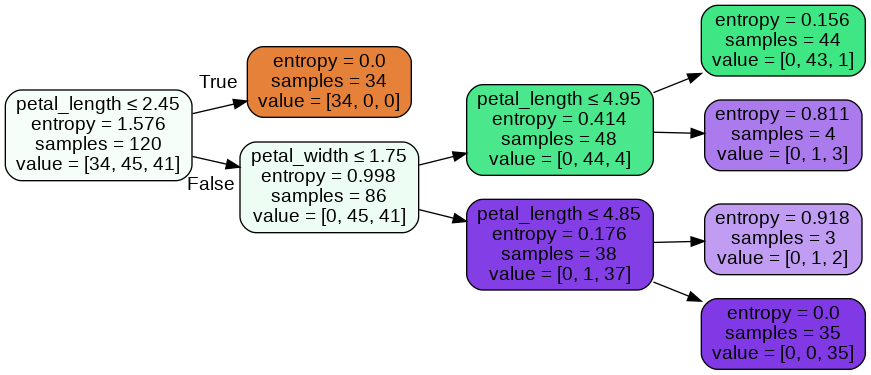

In [10]:
# Examine Tree

def plot_tree_classifier(clf, feature_names=None):
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        special_characters=True,
        rotate=True)

    return Image(graphviz.Source(dot_data).pipe(format='png'))

display(plot_tree_classifier(clf, feature_names=features))

Where each node contains:



*   Feature Name
*   Feature Value
*   Decision
*   Num of samples in subgroup
*   Num of samples belonging to each class



Lets take a moment to understand what is happening here. If you look at the root node, you notice the decision yielding the lowest entropy is petal_length less than or equal to 2.45.



*   How did the model arrive at this conclusion?
*   How does the model calculate entropy?


By calculating the entropy for every value in each feature column.
Using the below formula

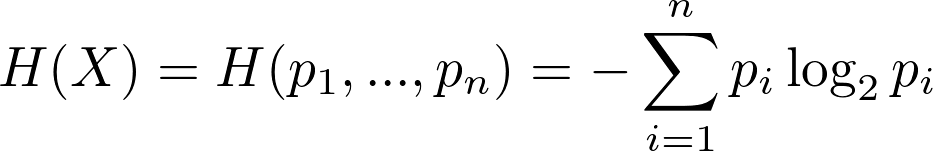

Where:


*   P_i = num of targets[i] / total num of targets




Thanks to sklearn, we don't need to worry about this at all. The power of opensource code really is amazing. However, if we wanted to verify the sklearn results, we could pretty easily do this and get the values at our root node. See below.

In [11]:
-34/120*np.log2(34/120)-45/120*np.log2(45/120)-41/120*np.log2(41/120)

1.5755009445527826

Same number as the root-node. Great.

**Feature Importance**

Feature importance is essentially *how much did this particular feature affect the prediction*.

In [8]:
# function to visualize feature importances of tree-based model
def rank_features_by_importance(importances, feature_names):
    indices = np.argsort(importances)[::-1]
    max_feature_name_length = max([len(feature) for feature in feature_names])

    print('      Feature{space: <{padding}}      Importance'.format(padding=max_feature_name_length - 8, space=' '))

    for x_train_i in range(len(importances)):
        print('{number:>2}. {feature: <{padding}} ({importance})'.format(
            number=x_train_i + 1,
            padding=max_feature_name_length,
            feature=feature_names[indices[x_train_i]],
            importance=importances[indices[x_train_i]]))
        
# get importances from pipeline forest model
imp = clf.feature_importances_

# call function with pipeline forest importances
rank_features_by_importance(imp,features)

      Feature          Importance
 1. petal_length (0.6632255782330626)
 2. petal_width  (0.33677442176693734)
 3. sepal_width  (0.0)
 4. sepal_length (0.0)


**Make Prediction**

In [14]:
print('PREDICTION: ', clf.predict(X_test.iloc[[0]]))
print('ACTUAL: ', y_test.iloc[0])

PREDICTION:  ['virginica']
ACTUAL:  virginica


Accuracy is great, as we can expect from a 97% accuracy score.



*   **Question:** How does the model calculate accuracy?
*   **Question:** How does the model make the prediction?

Both are pretty simple and intuitive. 

 - **Answer:** How many predictions were correct, divided by the total number of predictions, multiplied by 100.
 - **Answer:** The model will follow the learned paths, seen in the image above. It will first look and see, is the petal_length less than or equal to 2.45, etc... 





**Visualize Metrics**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


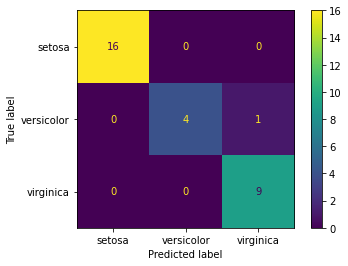

In [18]:
plot_confusion_matrix(clf, X_test, y_test)

The confusion matrix is a powerful visualization for classification in machine learning. It is self-explanatory. As we can see, only one instance from the test set was predicted incorrectly, the model predicted virginica but the flower actually belonged to the versicolor class.

This is so important because we can understand the pitfalls and successes of the model. In a production setting, when the results of a model will have real impact on a business decision, we need to know and understand where a prediction may need to be double-checked.

Imagine this, you're a doctor using a CNN to assist in diagnoses, it is imperative you have seen the confusion matrix and understand potential false negatives/false positives, as to not give an incorrect diagnoses.

## Example 2 - The RandomForest (Classification)

### Introduction

The RandomForest is an ensemble method because it ensembles (you may have already guessed..) many individual decision trees!

The algorithm isn't much more complex than the DecisionTree, there are a few main differences to note.


*   The RF algorithm will grab samples at random from the dataset, and fit an individual tree, this is called "bagging".
*   The final prediction is the most-frequent prediction by all the individual trees, this is called "voting". 

The benefit of this is by ensembling many "weak-learners" (individual decision trees), and taking the most-frequent prediction, our accuracy can be enhanced significantly.

The RF algorithm is one of the most widely-used, & consistently accurate solutions for many tabular data use-cases.

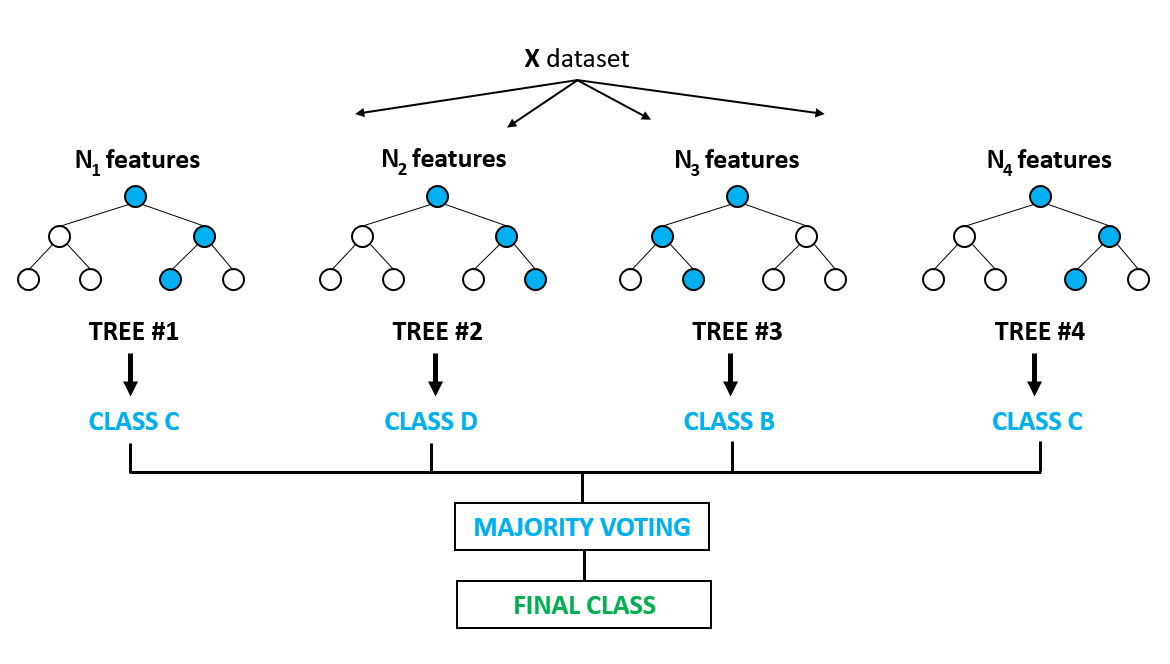

### Build RF Model

In [19]:
clf = RandomForestClassifier(n_estimators=20, max_depth=3)

clf.fit(X_train, y_train)

# Score
accuracy_score(clf.predict(X_test), y_test)

0.9666666666666667

Notice we are setting some parameters when initializing the RF.


*   n_estimators = num of individual trees
*   max_depth = depth of each tree



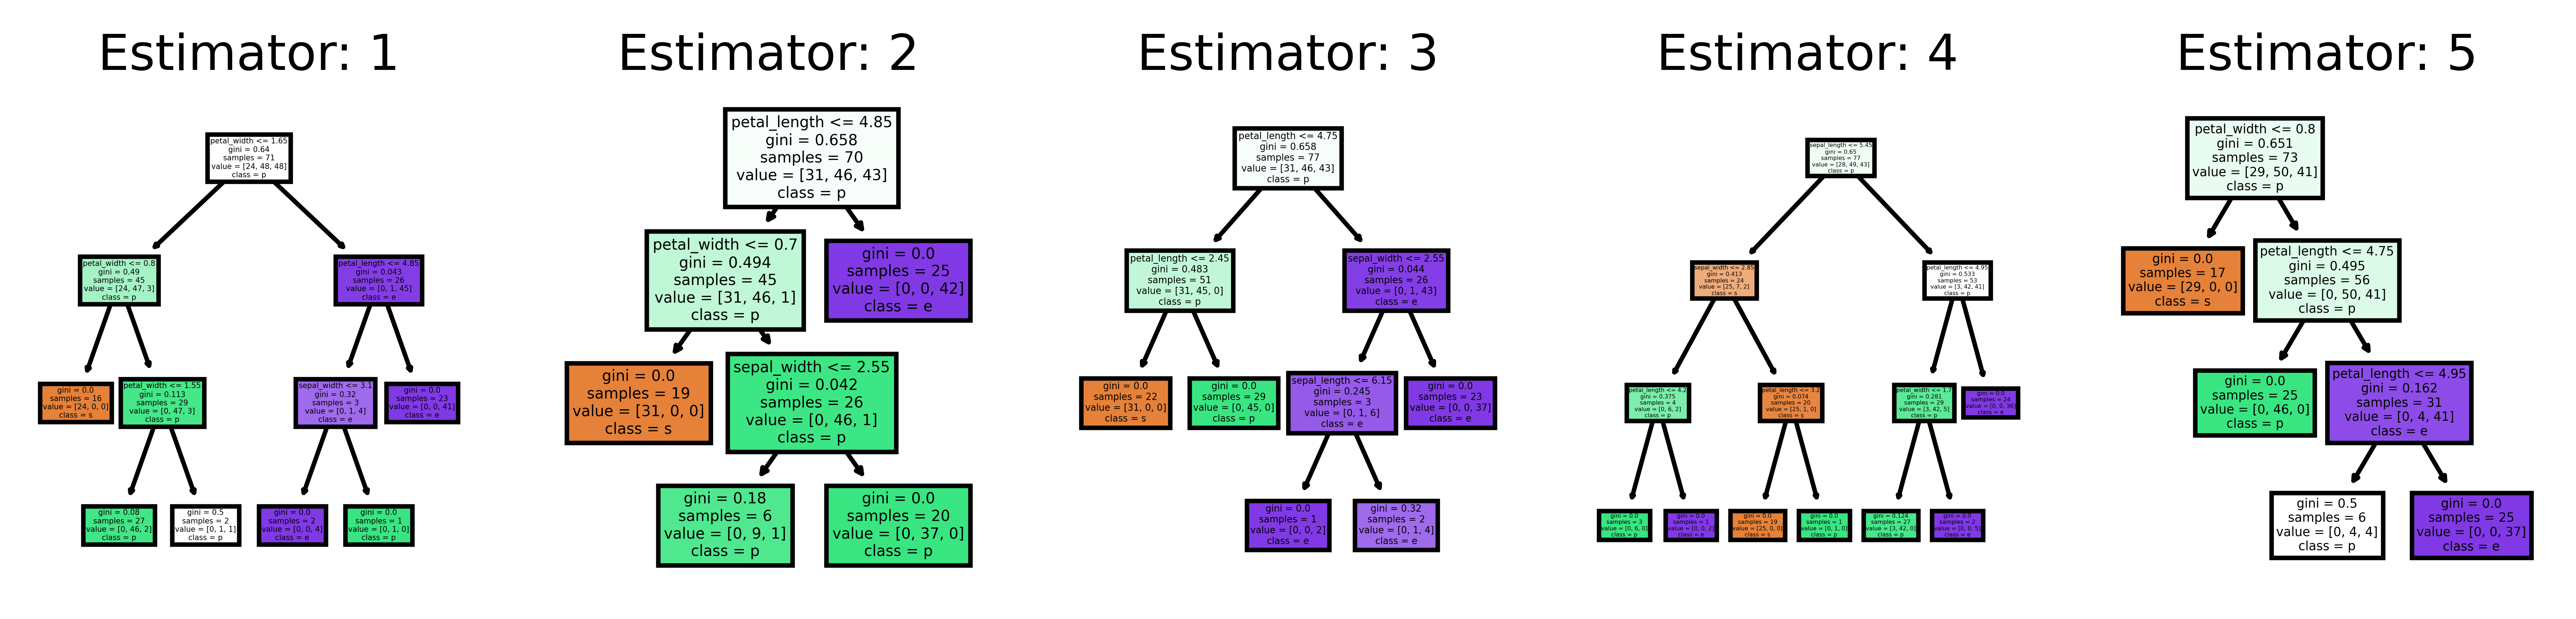

In [28]:
def plot_forest(features, target, n_trees):
    fig, axes = plt.subplots(nrows = 1, ncols = n_trees, figsize = (10,2), dpi=900)
    for index in range(0, 5):
        plot_tree(clf.estimators_[index],
                    feature_names = features, 
                    class_names=target,
                    filled = True,
                    ax = axes[index]);

        axes[index].set_title('Estimator: ' + str(index+1), fontsize = 11)

plot_forest(features, target, 5)

**Visualize Metrics**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


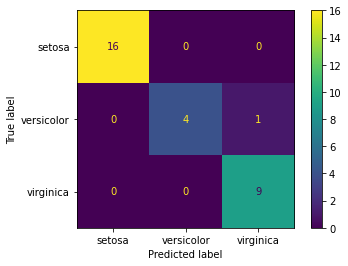

In [27]:
plot_confusion_matrix(clf, X_test, y_test)

## Example 3 - Regression Trees & Ensembles

### Introduction

In the previous two sections, we looked at tree and ensemble methods for classification. However, these algorithms are not exlusive to classification tasks, and can also be utilized for regression tasks.

The algorithms are similar, with a few main differences to be aware of.



*   Regression split criteria is MSE (mean squarred error), instead of entropy. 
*   Prediction is calculated using mean, not most frequent.



### Data

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/j0sephsasson/Pepsi-Training-Course/main/datasets/housing.csv', index_col=0)
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [10]:
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

Lets try to predict the price

In [11]:
features = list(data.columns)
features.remove('price')
target = 'price'

X = data[features].copy()
y = data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 4)

X_train.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
109,3000,3,2,2,yes,yes,yes,no,no,0,no
64,4820,3,1,2,yes,no,no,no,no,0,no
499,8250,3,1,1,yes,no,no,no,no,0,no
517,6000,3,2,3,yes,yes,no,no,yes,0,no
65,5500,4,1,2,yes,yes,yes,no,no,0,no


Now - time for some feature engineering! We will encode and scale.

### Feature Engineering

Lets bring back our feature engineering function from yesterday.

In [12]:
def clean_dataset(frame, features):
    """
    This function performs feature engineering on a dataframe

    1. Imputing
    2. Encoding
    3. Scaling

    Params:
      -- 'data': pd.DataFrame
      -- 'features': list[str]
      
    Returns:
      -- 'data': pd.DataFrame
    """

    data = frame.copy()

    # Perform imputing
    for col in features:

        if col not in list(data.columns):
            data.drop(columns=col, inplace=True)

        # if we have category use most frequent
        if data[col].dtypes == 'O':
            imputer = SimpleImputer(strategy='most_frequent')
            data[col] = imputer.fit_transform(data[col].values.reshape(-1, 1))

        # if we have number use mean
        elif data[col].dtypes == 'int64' or data[col].dtypes == 'float64':
            imputer = SimpleImputer(strategy='mean')
            data[col] = imputer.fit_transform(data[col].values.reshape(-1, 1))

    ## encode categorical features ##
    for col in features:
        if data[col].dtypes == 'O':
            data[col] = LabelEncoder().fit_transform(data[col])

    ## scale numercial features ##
    for col in features:
        if data[col].dtypes == 'int64' or data[col].dtypes == 'float64':
            data[col] = StandardScaler().fit_transform(data[col].values.reshape(-1, 1))

    return data

X_clean = clean_dataset(frame=X_train, features=list(X_train.columns))
X_clean.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
109,-1.034818,0.043502,1.385957,0.200232,1,1,1,0,0,-0.795189,0
64,-0.189777,0.043502,-0.569633,0.200232,1,0,0,0,0,-0.795189,0
499,1.402802,0.043502,-0.569633,-0.919013,1,0,0,0,0,-0.795189,0
517,0.358108,0.043502,1.385957,1.319476,1,1,0,0,1,-0.795189,0
65,0.125953,1.398271,-0.569633,0.200232,1,1,1,0,0,-0.795189,0


In [13]:
X_clean_test = clean_dataset(frame=X_test, features=list(X_test.columns))
X_clean_test.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
493,-0.360848,-1.305885,-0.572158,-1.002038,1,0,0,0,0,-0.845280,0
303,-0.365420,-1.305885,-0.572158,0.325964,1,0,0,0,0,0.378151,0
67,0.091776,0.062185,-0.572158,0.325964,1,0,1,0,1,-0.845280,0
271,-0.548298,0.062185,1.598096,0.325964,1,0,1,0,0,-0.845280,0
453,0.576403,0.062185,-0.572158,-1.002038,1,0,1,0,1,-0.845280,1


In practice, we would perform feature selection, and then feature engineering.

Also, like our exercise yesterday, we would use the same encoder/scalar objects on the training and testing sets. 

For the purpose of this example, it is not neccessary.

### Regression Tree Model

In [15]:
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(X_clean, y_train)
score = clf.score(X_clean_test, y_test)

print('DEPTH OF THREE SCORE:', score)

DEPTH OF THREE SCORE: 0.313174526222611


Where score = R2 score (remember the regression lesson!)

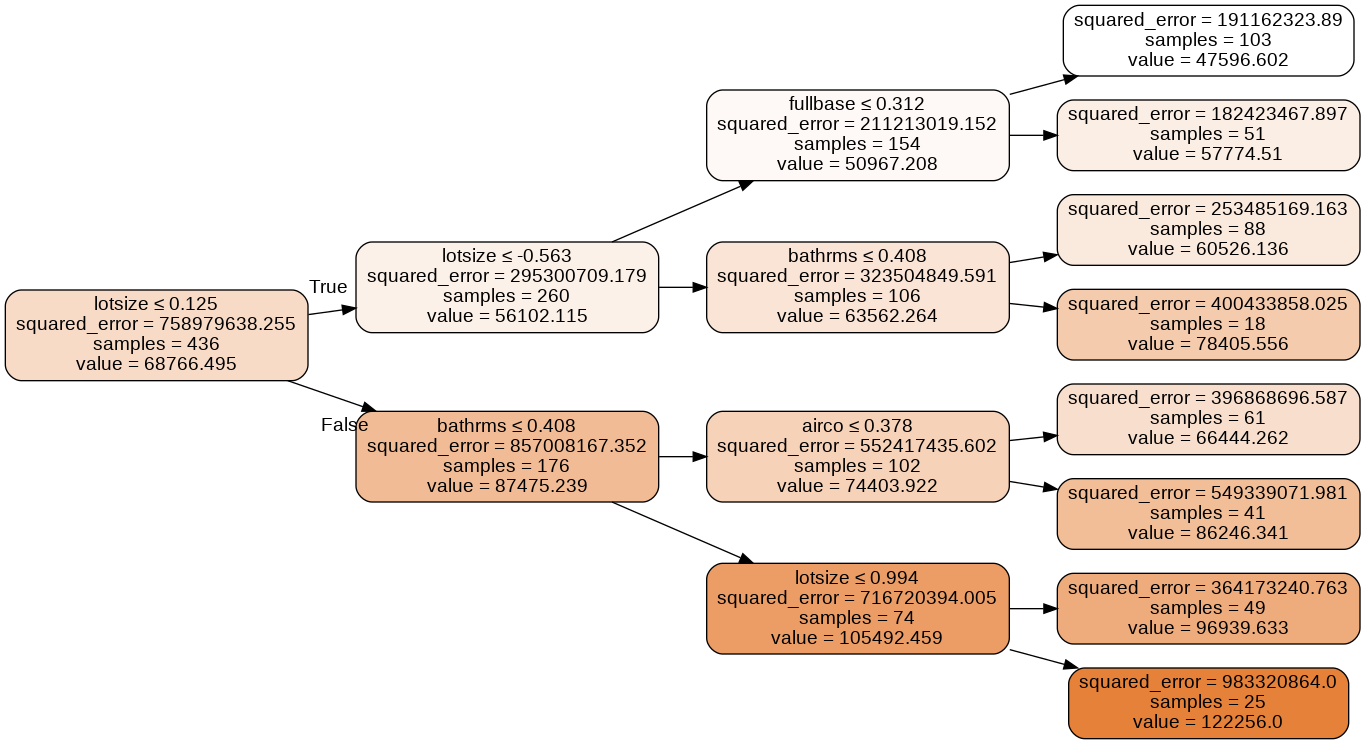

In [40]:
plot_tree_classifier(clf, features)

In [46]:
print('PREDICTED:', clf.predict(X_clean_test.iloc[[0]]))
print('ACTUAL:', y_test.iloc[0])

PREDICTED: [60526.13636364]
ACTUAL: 53000.0


## Conclusion

**Question 1:** 
How do we interpret the score of an ensemble-regression (RF) model?



1.   Splitting criteria
2.   It is the R2 score
3.   It is the number of samples



**Question 2:** 
How do we interpret the score of a tree-classification model?



1.   Splitting criteria
2.   It is the number of samples
3.   It is the accuracy



**Question 3:** 
What is a confusion-matrix?



1.   A plot of the models predictions and the true labels
2.   It is used to confuse the model by adding noise
3.   Input data to the model



**Question 4:** 
The difference between a tree-based model and an ensemble model is?



1.   A tree usually has better accuracy
2.   An ensemble model has hundreds or thousands of individual trees
3.   We use different data for each algorithm

